In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from utils import building_unit_types, adoption_tiers, original_adoption_tiers
import os
import pickle
import numpy as np
import seaborn as sns
from itertools import product

In [2]:
city_names = ["columbus"]
unit_numbers = [8]#,800]
# unit_type_to_color = ["red", "purple", "teal", "gold", "navy", "magenta", "lime", "black"]


In [3]:
# def is_successful_upgrade(city_name, unit_type):
#     file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
#     if os.path.exists(file_name):
#         output = pd.read_csv(file_name)
#         return output.loc[0,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"
#     return False
def fill_a_table(table_filling_fn=None):
    # print(f"Filling a table with {'is_successful_upgrade' if table_filling_fn is None else table_filling_fn.__name__}")
    table_to_fill = pd.DataFrame(columns=unit_numbers, index=adoption_tiers)
    city_name = "columbus"
    for unit_num in unit_numbers:
        for unit_type in building_unit_types:
            file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            print(file_name)

            if os.path.exists(file_name):
                print(file_name)
                output = pd.read_csv(file_name)
                print(output.columns)
                # print(output.loc[0,"hvac_has_ducts"])
                for adoption_tier in adoption_tiers:
                    table_to_fill.loc[adoption_tier,unit_num] = table_filling_fn((output, adoption_tier)) 
            else:
                table_to_fill.loc[adoption_tier,unit_num] =  None
            # is_successful_upgrade(city_name, unit_type) if table_filling_fn is None else table_filling_fn(city_name, unit_type)
            
    return table_to_fill



# def table_of_success_failure():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"))

def table_of_tier():
    return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))

def table_of_hvac_has_ducts():
    return fill_a_table(lambda x: x[0].loc[:,"hvac_has_ducts"] == "Yes")

In [11]:
# success_failure_table = table_of_success_failure()

In [32]:
city_name = "minneapolis"
unit_type = "SFD"
file_name = os.path.join(os.getcwd(), "cmu-tare-model", "output_results",f"{city_name}_upgrades_91_{unit_type}_unit_residence", "tare_output.csv")
# if not os.path.exists(file_name):
    # pass
print(file_name)
output = pd.read_csv(file_name)
print(output.shape)
adopting_output = output[output["iraRef_mp8_heating_adoption"] != "Tier 4: Averse"]


/mnt/c/Users/Arnav/Documents/Research/Trane_Technologies/cmu-tare-model/output_results/minneapolis_upgrades_91_SFD_unit_residence/tare_output.csv
(80, 287)


In [39]:
adopting_output

,Unnamed: 0,applicable_upgrade_x,bldg_id,census_division,state,city,puma,county,reeds_balancing_area,income,...,preIRA_mp8_heating_additional_public_benefit,preIRA_mp8_heating_total_npv_lessWTP,preIRA_mp8_heating_total_npv_moreWTP,preIRA_mp8_heating_adoption,preIRA_mp8_heating_retrofit_publicImpact,iraRef_mp8_heating_additional_public_benefit,iraRef_mp8_heating_total_npv_lessWTP,iraRef_mp8_heating_total_npv_moreWTP,iraRef_mp8_heating_adoption,iraRef_mp8_heating_retrofit_publicImpact
0,0,True,1,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,54999.5,...,0.0,-26429.55,-23883.96,Tier 4: Averse,Public Benefit,31344.15,5238.51,7784.10,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
1,1,True,2,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,129999.5,...,0.0,-19864.51,-17418.02,Tier 4: Averse,Public Benefit,20950.46,1281.83,3728.32,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
3,3,True,5,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,NaN,...,0.0,-12541.68,-10169.21,Tier 4: Averse,Public Benefit,12875.66,420.81,2793.28,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
5,5,True,8,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,89999.5,...,0.0,-14644.55,-12351.00,Tier 4: Averse,Public Benefit,20100.54,5638.79,7932.34,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
6,6,True,9,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,129999.5,...,0.0,-22084.88,-19629.76,Tier 4: Averse,Public Benefit,24527.30,2712.32,5167.44,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,True,86,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,189999.5,...,0.0,-34285.21,-31410.36,Tier 4: Averse,Public Benefit,40133.20,6206.14,9080.99,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
76,76,True,87,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,47499.5,...,0.0,-11477.61,-9211.52,Tier 4: Averse,Public Benefit,11504.09,129.72,2395.81,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
77,77,True,88,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,64999.5,...,0.0,-20497.08,-18042.41,Tier 4: Averse,Public Benefit,32971.57,12725.95,15180.62,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
78,78,True,89,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,22499.5,...,0.0,-17564.51,-15255.93,Tier 4: Averse,Public Benefit,15311.50,-2105.25,203.33,Tier 3: Subsidy-Dependent Feasibility,Public Benefit


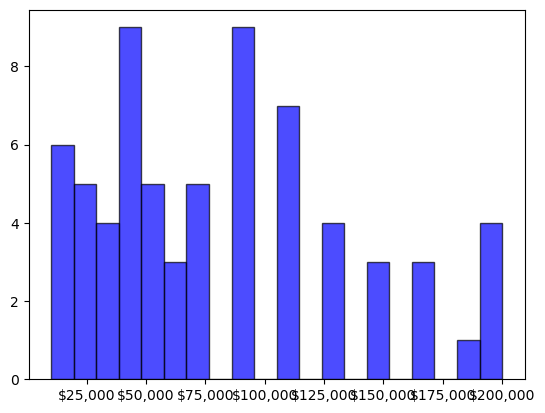

In [38]:
plt.hist(adopting_output["income"], bins=20, color='blue', edgecolor='black', alpha=0.7)
# ax = plt.gca()  # Get the current axis
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# adopting_output.plot("income")

<BarContainer object of 3 artists>

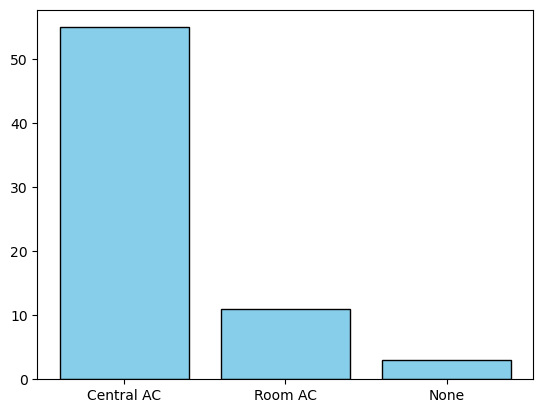

In [40]:
category_counts = adopting_output["hvac_cooling_type"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')


<BarContainer object of 2 artists>

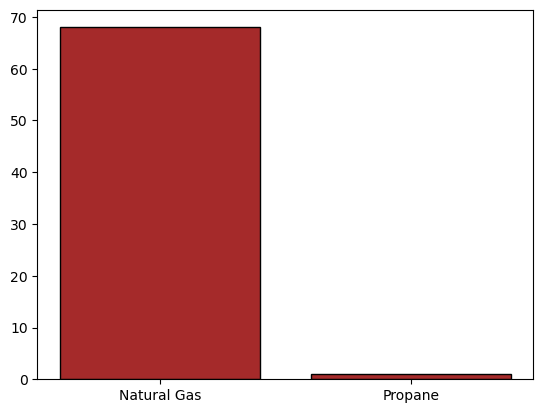

In [42]:
category_counts = adopting_output["base_heating_fuel"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='brown', edgecolor='black')


In [9]:
success_failure_table

,8,800
Existing Equipment,7,572
Tier 1: Feasible,7,572
Tier 2: Feasible vs. Alternative,7,572
Tier 3: Subsidy-Dependent Feasibility,7,572
Feasible per MMPV,7,572


In [60]:
has_ducts_table = table_of_hvac_has_ducts()

In [61]:
has_ducts_table

,columbus,minneapolis
2,True,True
3_4,True,True
5_9,None,True
10_19,None,None
20_49,None,True
50_plus,None,True
SFA,True,True
SFD,True,True


In [51]:
# def table_of_tier():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))
num_residences = 800
table_to_fill = pd.DataFrame(index=adoption_tiers)
city_name = "columbus"
all_filenames = dict()
all_filenames[f"{num_residences}_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt95_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt95_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt07_tare_output.csv")
# all_filenames["8_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")

for scenario, file_name in all_filenames.items():
    if os.path.exists(file_name):
        output = pd.read_csv(file_name)
        for adoption_tier in adoption_tiers:
            table_to_fill.loc[adoption_tier,scenario] = sum(output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier)# table_filling_fn((output, adoption_tier)) 
    else:
        table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

,800_NPV,800_MMPV_ALPHApt95_DRpt02,800_MMPV_ALPHApt9_DRpt02,800_MMPV_ALPHApt9_DRpt07,800_MMPV_ALPHApt5_DRpt02,800_MMPV_ALPHApt5_DRpt07
Existing Equipment,0.0,0.0,0.0,0.0,0.0,0.0
Tier 1: Feasible,0.0,0.0,0.0,0.0,0.0,0.0
Tier 2: Feasible vs. Alternative,10.0,6.0,7.0,10.0,7.0,10.0
Tier 3: Subsidy-Dependent Feasibility,217.0,57.0,62.0,215.0,60.0,226.0
Feasible per MMPV,0.0,125.0,299.0,343.0,565.0,400.0
Tier 4: Averse,434.0,473.0,293.0,93.0,29.0,25.0


In [52]:
table_to_fill.to_csv(os.path.join("output_results", f"comparing_columbus_{num_residences}_across_npv_and_MMPV.csv"))

In [14]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"100_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_100_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_100_labels_)

len(kmeans_resstock_100_labels_)

661

In [15]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

661

In [41]:
table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_100_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Existing Equipment
4
Existing Equipment
5
Existing Equipment
6
Existing Equipment
7
Existing Equipment
8
Existing Equipment
9
Existing Equipment
10
Existing Equipment
11
Existing Equipment
12
Existing Equipment
13
Existing Equipment
14
Existing Equipment
15
Existing Equipment
16
Existing Equipment
17
Existing Equipment
18
Existing Equipment
19
Existing Equipment
20
Existing Equipment
21
Existing Equipment
22
Existing Equipment
23
Existing Equipment
24
Existing Equipment
25
Existing Equipment
26
Existing Equipment
27
Existing Equipment
28
Existing Equipment
29
Existing Equipment
30
Existing Equipment
31
Existing Equipment
32
Existing Equipment
33
Existing Equipment
34
Existing Equipment
35
Existing Equipment
36
Existing Equipment
37
Existing Equipment
38
Existing Equipment
39
Existing Equipment
40
Existing Equipment
41
Existing Equipment
42
Existing Equipment
43
Existing Equipment
44
Existing Equipment
4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Existing Equipment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tier 1: Feasible,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tier 2: Feasible vs. Alternative,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Tier 3: Subsidy-Dependent Feasibility,0,5,0,2,2,1,6,3,1,1,...,0,1,0,3,2,0,2,3,3,0
Feasible per MMPV,1,6,0,8,3,0,4,7,3,0,...,0,0,0,3,1,2,2,3,5,0
Tier 4: Averse,1,3,4,0,0,0,1,1,0,0,...,1,1,1,0,4,0,0,1,1,1


In [29]:
table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_800_MMPV.csv"))

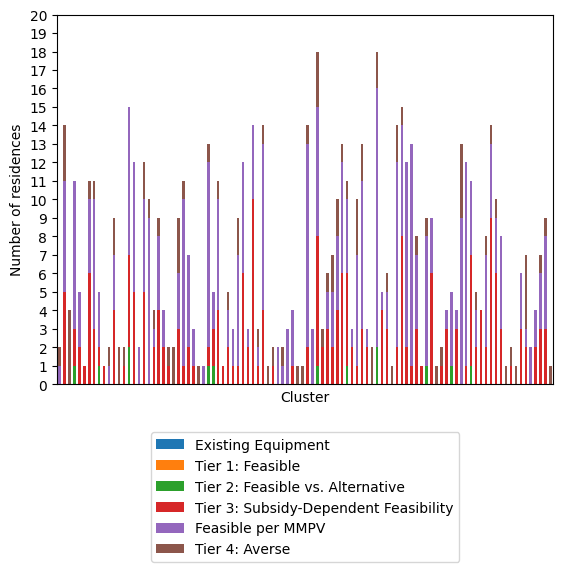

In [39]:
table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(21))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Tier 1: Feasible
0
Tier 1: Feasible
1
Tier 1: Feasible
2
Tier 1: Feasible
3
Tier 2: Feasible vs. Alternative
0
Tier 2: Feasible vs. Alternative
1
Tier 2: Feasible vs. Alternative
2
Tier 2: Feasible vs. Alternative
3
Tier 3: Subsidy-Dependent Feasibility
0
Tier 3: Subsidy-Dependent Feasibility
1
Tier 3: Subsidy-Dependent Feasibility
2
Tier 3: Subsidy-Dependent Feasibility
3
Feasible per MMPV
0
Feasible per MMPV
1
Feasible per MMPV
2
Feasible per MMPV
3
Tier 4: Averse
0
Tier 4: Averse
1
Tier 4: Averse
2
Tier 4: Averse
3
                                       0  1  2  3
Existing Equipment                     0  0  0  0
Tier 1: Feasible                       0  0  0  0
Tier 2: Feasible vs. Alternative       0  0  0  0
Tier 3: Subsidy-Dependent Feasibility  1  0  1  0
Feasible per MMPV                      0  4  0  1
Tier 4: Averse                         0  0  0  0


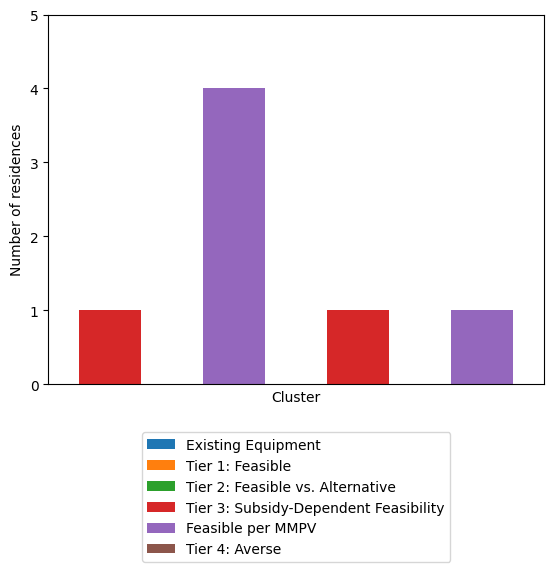

In [43]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_4_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_4_labels_)

len(kmeans_resstock_4_labels_)

with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_4_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_8_MMPV.csv"))
print(table_to_fill)

table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(6))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

In [4]:
def create_stacked_bar_chart(num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
        kmeans_resstock_labels_ = pickle.load(f)
    
    # print(kmeans_resstock_labels_)

    unique_labels = np.unique(kmeans_resstock_labels_)

    # len(kmeans_resstock_labels_)

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
        building_IDs = pickle.load(f)

    # len(building_IDs)

    table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
    city_name = "columbus"
    file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
    # for unit_num in unit_numbers:
    #     for unit_type in building_unit_types:
    #         all_filenames.append()
            
            # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            # print(file_name)
    if os.path.exists(file_name):
        # print(file_name)
        output = pd.read_csv(file_name)
        # print(output.columns)
        # print(output.loc[0,"hvac_has_ducts"])
        for adoption_tier in adoption_tiers:
            for cluster_label in unique_labels:
                # print(adoption_tier)
                # print(cluster_label)
                is_in_this_cluster = pd.Series(kmeans_resstock_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
                is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
                table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
    else:
        raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv")
        # table_to_fill.loc[adoption_tier,scenario] =  None

    table_to_fill.to_csv(os.path.join("output_results", f"comparing_clusters_of_columbus_{num_residences}_{scenario}.csv"))
    # print(table_to_fill)

    table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    plt.xticks(rotation=0)
    # plt.yticks(range(max(table_to_fill.loc[:,scenario])))
    plt.xlabel("Cluster")
    plt.ylabel("Number of residences")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    plt.title(scenario)

    if save_fig:
        plt.savefig(os.path.join("output_results", f"columbus_{num_residences}_all_unit_residence", f"tiers_of_columbus_{num_residences}_{scenario}.svg"))
    plt.show()




[1 0 0 3 2 0 0]


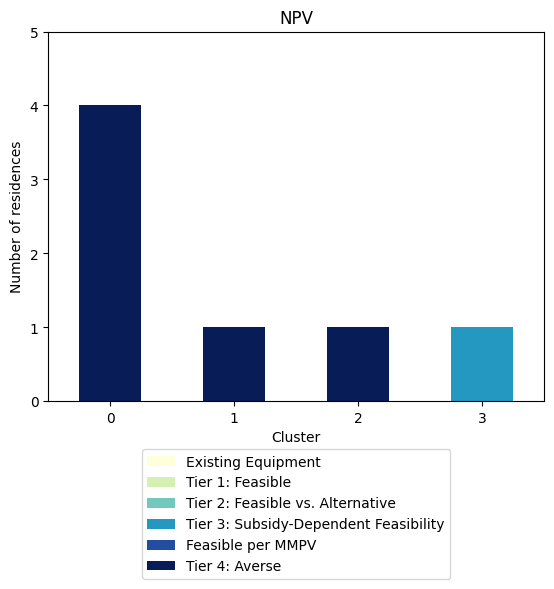

In [28]:
num_residences = 8
scenario = "NPV" #"MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario, save_fig = True) #  prefix="no_cooling_benefits_25_year_lifetime", 

In [ ]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07"

create_stacked_bar_chart(num_residences, scenario)

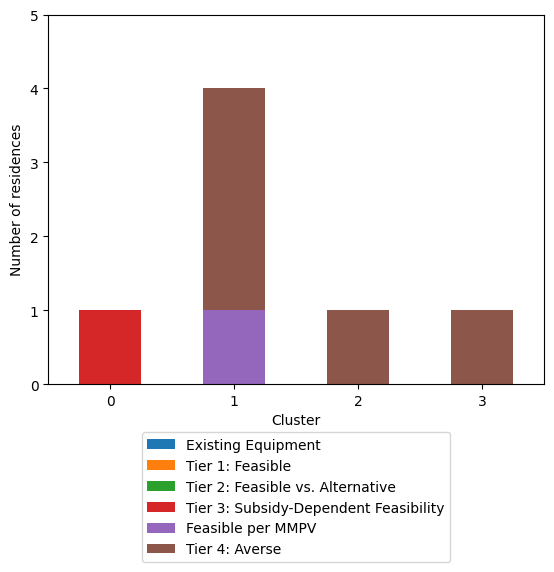

In [64]:
num_residences = 8
scenario = "MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [38]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

[1 0 0 3 2 0 0]


Exception: no file found for alpha_beta_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv

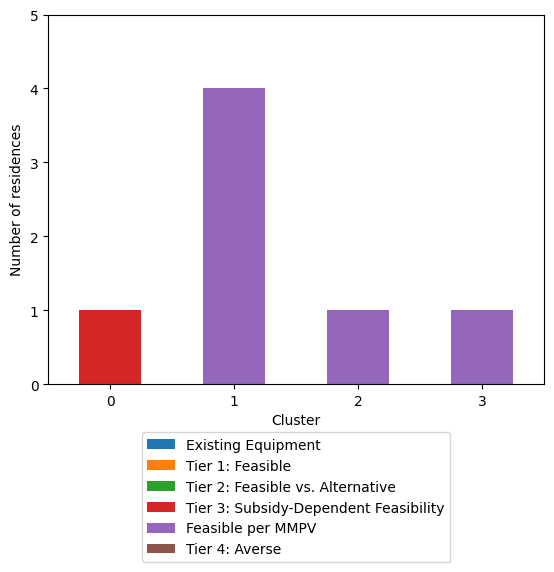

In [4]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [47]:
def table_of_heating_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_heating_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_heating_consumption():
    heating_consumption_table = table_of_heating_consumption()
    # print(heating_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(heating_consumption_table.loc[unit_type,city])
            if heating_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(heating_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Heating Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(heating_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("heating_consumption_comparison.svg", bbox_inches="tight")
    return heating_consumption_table

In [8]:
# heating_consumption_table = graph_heating_consumption()

NameError: name 'graph_heating_consumption' is not defined

In [49]:
def table_of_cooling_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_cooling_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_cooling_consumption():
    cooling_consumption_table = table_of_cooling_consumption()
    # print(cooling_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(cooling_consumption_table.loc[unit_type,city])
            if cooling_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(cooling_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Cooling Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(cooling_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("cooling_consumption_comparison.svg", bbox_inches="tight")
    return cooling_consumption_table

In [50]:
# graph_cooling_consumption()

KeyError: 'baseline_2024_cooling_consumption'

In [76]:
def table_of_NPV_calculations():
    col_names = [
        "iraRef_mp8_heating_public_npv",
        "iraRef_mp8_heating_total_capitalCost",
        "iraRef_mp8_heating_net_capitalCost",
        "iraRef_mp8_heating_private_npv_lessWTP",
        "iraRef_mp8_heating_private_npv_moreWTP",
    # "iraRef_mp8_heating_additional_public_benefit",
    # "iraRef_mp8_heating_total_npv_lessWTP",
    # "iraRef_mp8_heating_total_npv_moreWTP",
    ]
    # col_map = {"iraRef_mp8_heating_public_npv": "Public NPV",
    #             "iraRef_mp8_heating_total_capitalCost": "Capital Cost",
    #             "iraRef_mp8_heating_additional_public_benefit": "Additional Public Benefit",
    #             "iraRef_mp8_heating_total_npv_lessWTP": "NPV Lower Bound",
    #             "iraRef_mp8_heating_total_npv_moreWTP": "NPV Upper Bound"}
    new_col_names = [
        "Public NPV",
        "Total Capital Cost",
        "Net Capital Cost",
        "Private NPV Lower Bound",
        "Private NPV Upper Bound",
        # "Additional Public Benefit",
        # "NPV Lower Bound",
        # "NPV Upper Bound",
        ]
    intermediate_table = fill_a_table(lambda x: [x.loc[0,col_name] for col_name in col_names])
    new_columns = pd.MultiIndex.from_product([intermediate_table.columns, new_col_names])
    new_df = pd.DataFrame(index=intermediate_table.index, columns=new_columns)
    # Fill the new DataFrame with split list values or None
    for col in intermediate_table.columns:
        for i, val in intermediate_table[col].items():
            if isinstance(val, list):
                # If it's a list, spread the values across the 5 columns
                new_df.loc[i, col] = val
            else:
                # If it's None, fill with None in all 5 sub-columns
                new_df.loc[i, col] = [None] * len(col_names)
    return new_df

In [77]:
# NPV_calculations_table = table_of_NPV_calculations()

In [78]:
# NPV_calculations_table

columbus                                      \
        Public NPV Total Capital Cost Net Capital Cost   
2          4588.53            8673.15          6475.49   
3_4        4886.31            7243.37          5042.54   
5_9           None               None             None   
10_19         None               None             None   
20_49         None               None             None   
50_plus       None               None             None   
SFA        6913.51            6246.61          4035.42   
SFD       12642.34           10360.68          8054.59   

                                                        minneapolis  \
        Private NPV Lower Bound Private NPV Upper Bound  Public NPV   
2                     -11167.12                -8969.46     7927.43   
3_4                    -9841.19                -7640.36     7927.43   
5_9                        None                    None     4274.12   
10_19                      None                    None        None   
20_49                      None                    None         0.0   
50_plus                    None                    None     2789.09   
SFA                    -9479.06                -7267.87    12968.07   
SFD                   -16281.86               -13975.77     9853.69   

                                                                     \
        Total Capital Cost Net Capital Cost Private NPV Lower Bound   
2                  7835.42          5618.48                -9797.17   
3_4                8738.02          6521.08               -10699.77   
5_9                5828.99          3660.55                -6983.78   
10_19                 None             None                    None   
20_49              6130.51          4035.96                -8267.85   
50_plus            6152.13          4005.42                -6876.31   
SFA                7569.41          5333.97               -10694.06   
SFD                9039.38           6814.3               -11442.24   

                                 
        Private NPV Upper Bound  
2                      -7580.23  
3_4                    -8482.83  
5_9                    -4815.34  
10_19                      None  
20_49                   -6173.3  
50_plus                 -4729.6  
SFA                    -8458.62  
SFD                    -9217.16

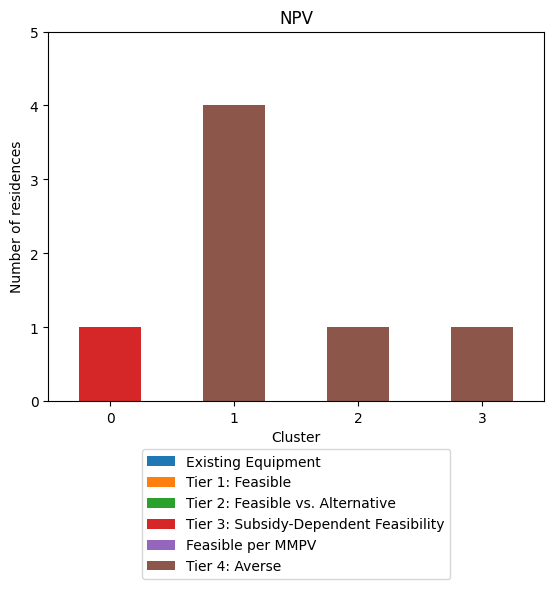

In [59]:
create_stacked_bar_chart(8, "NPV", prefix="alpha_beta")

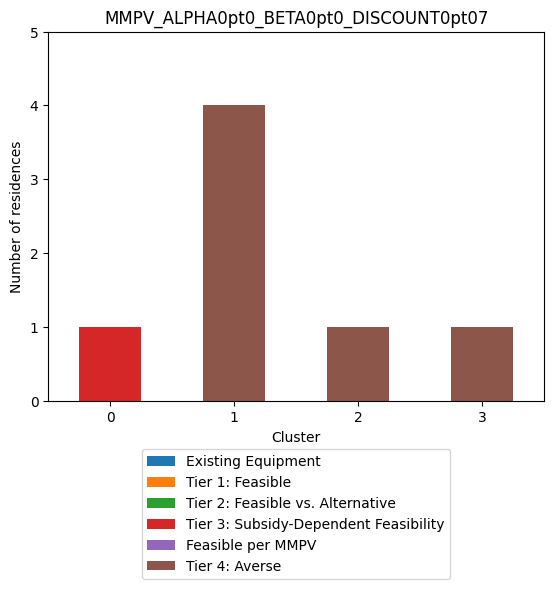

In [60]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

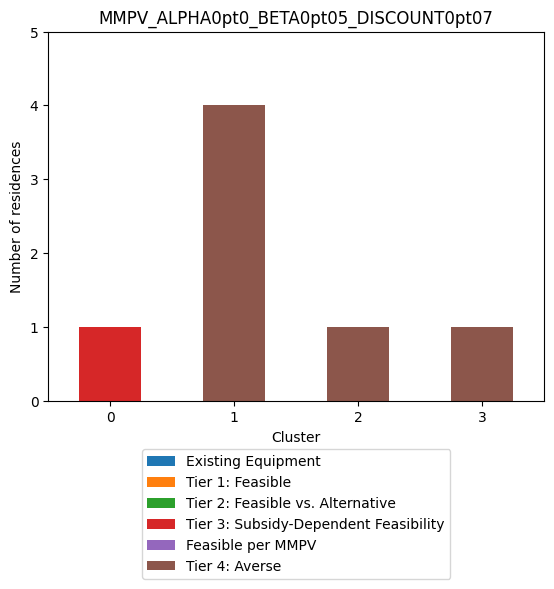

In [61]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

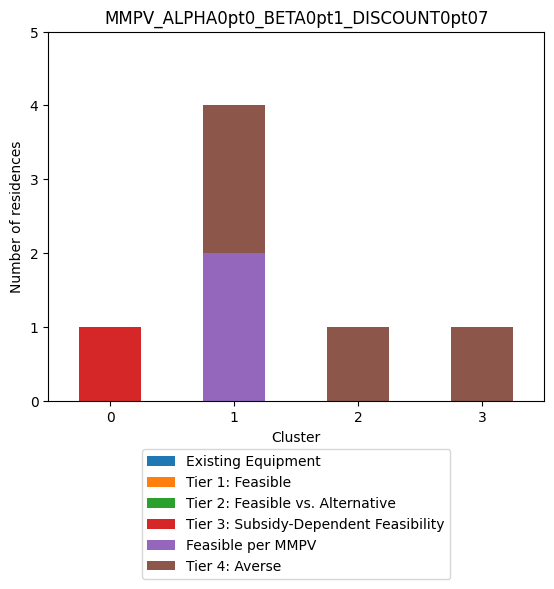

In [62]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

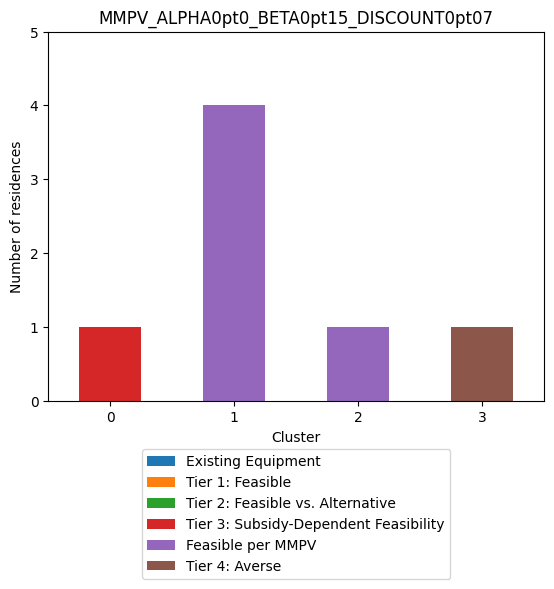

In [63]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

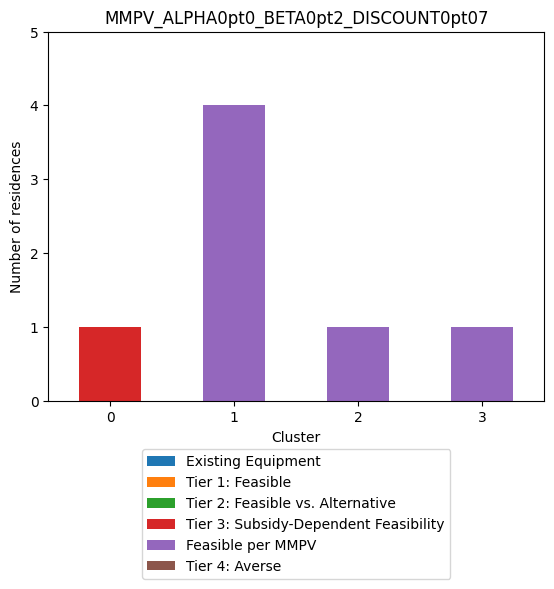

In [64]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

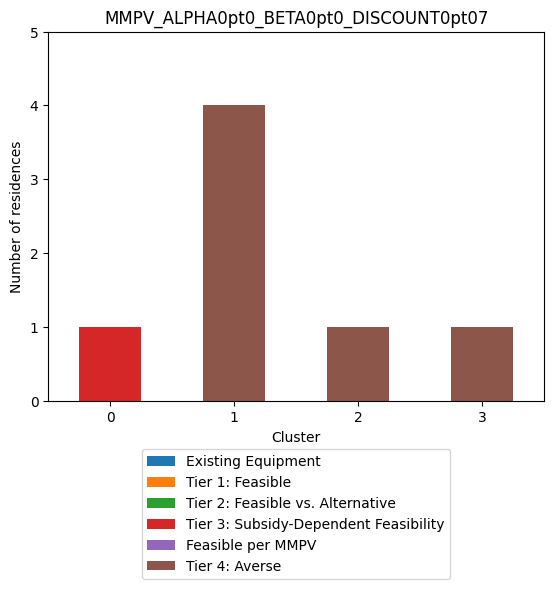

In [65]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

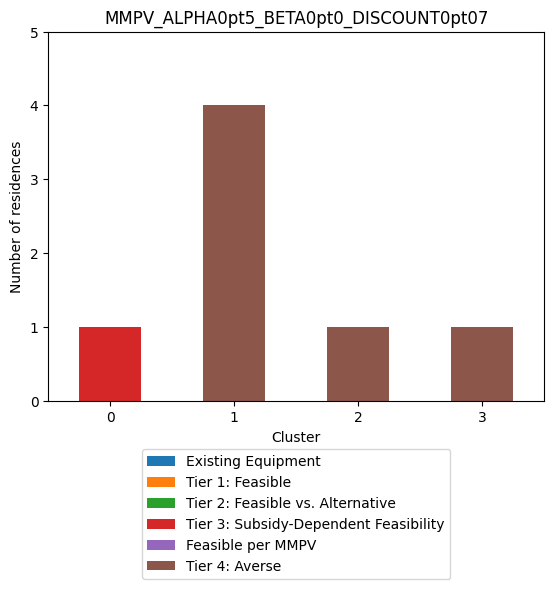

In [66]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

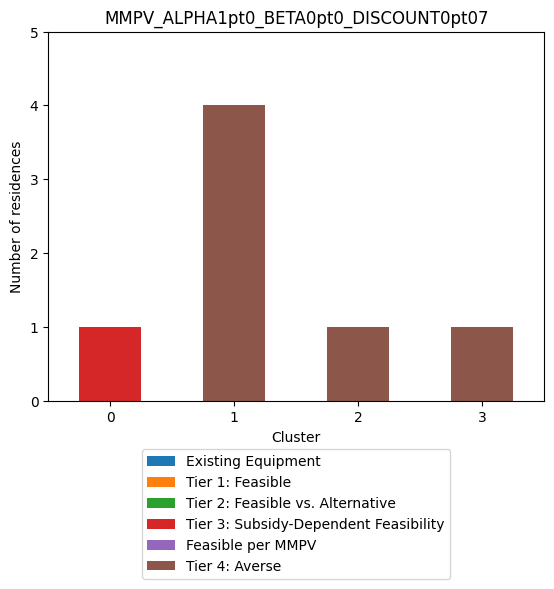

In [68]:
create_stacked_bar_chart(8, "MMPV_ALPHA1pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

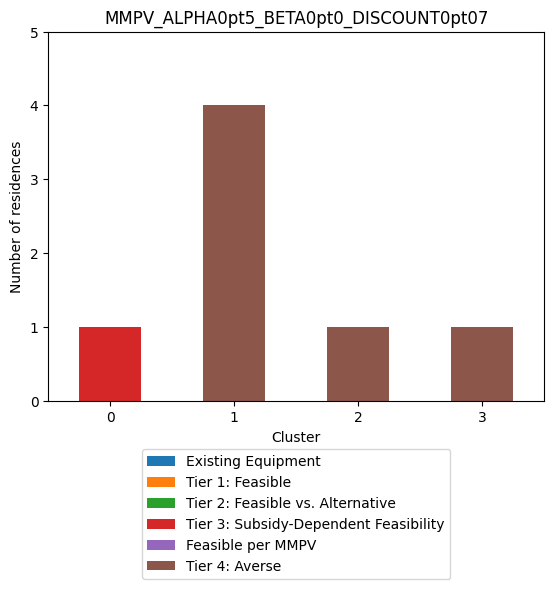

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

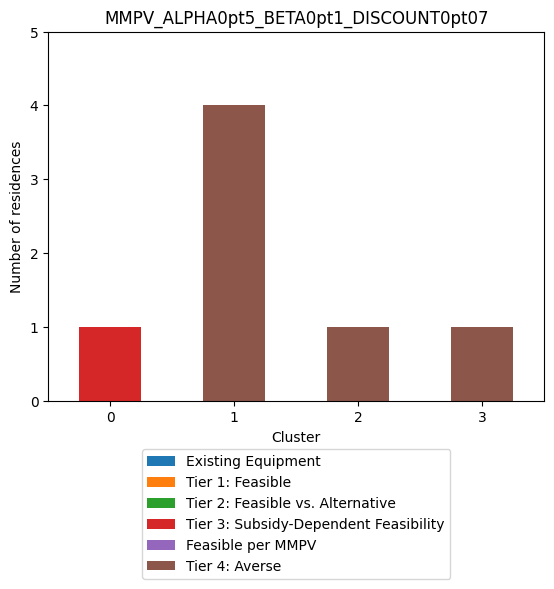

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

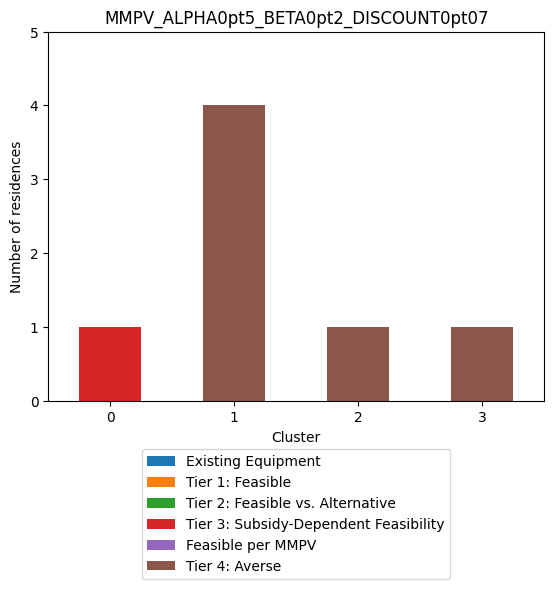

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

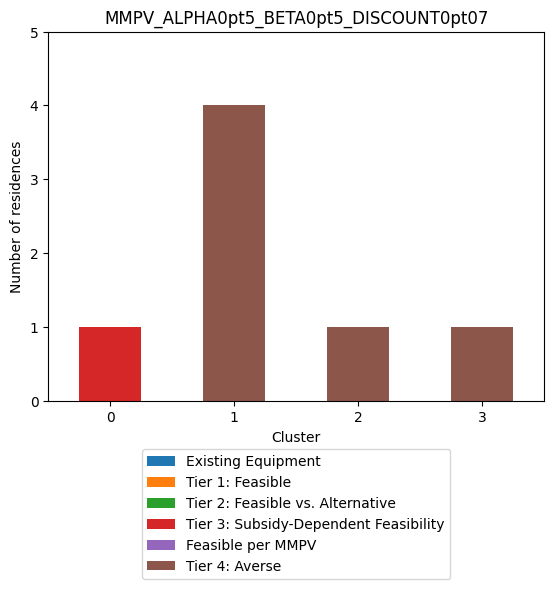

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt5_DISCOUNT0pt07", prefix="alpha_beta")

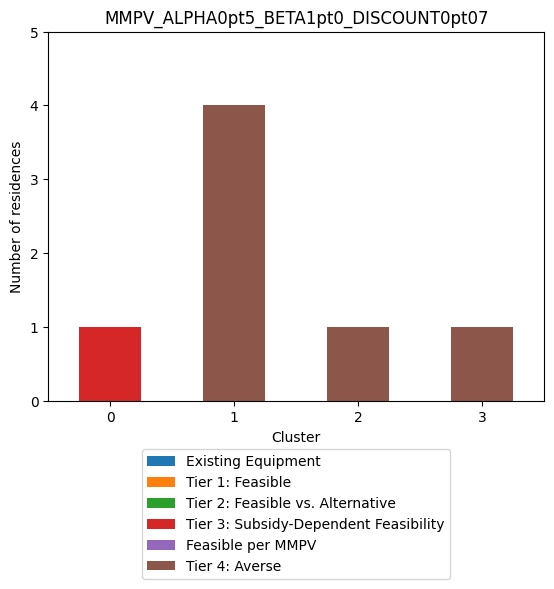

In [34]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA1pt0_DISCOUNT0pt07", prefix="alpha_beta")

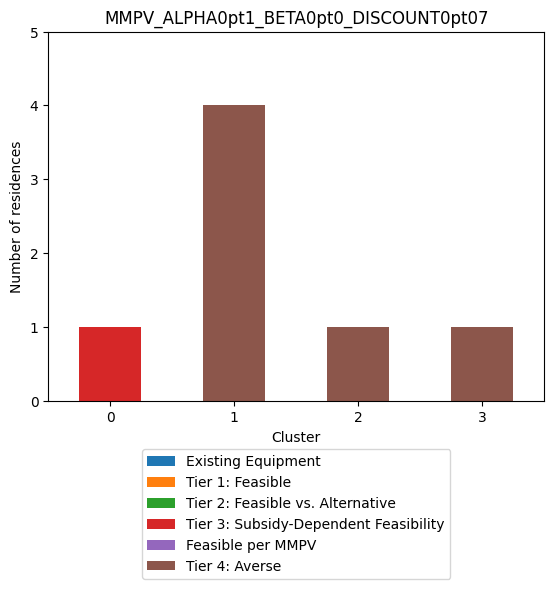

In [35]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

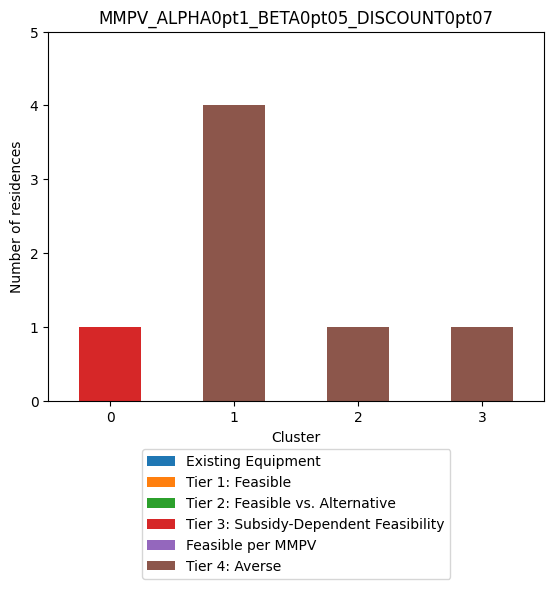

In [37]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

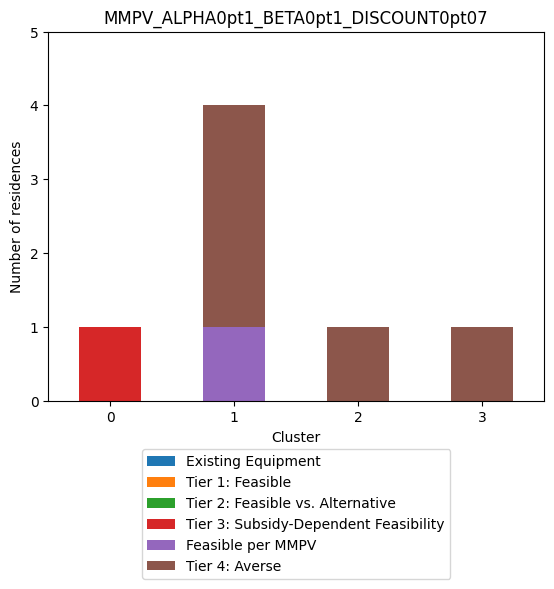

In [38]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

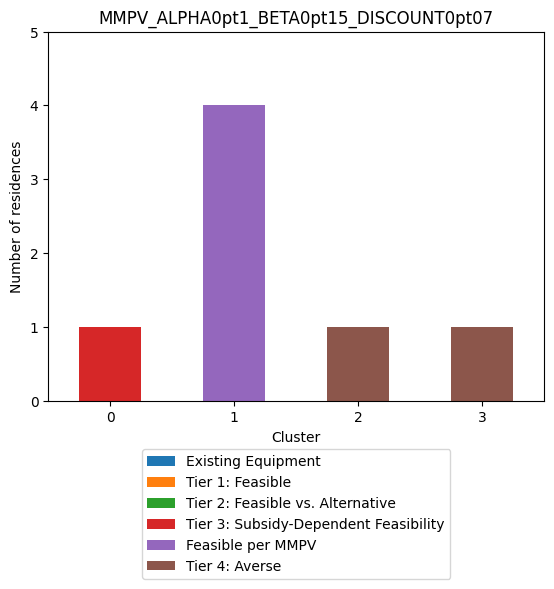

In [39]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

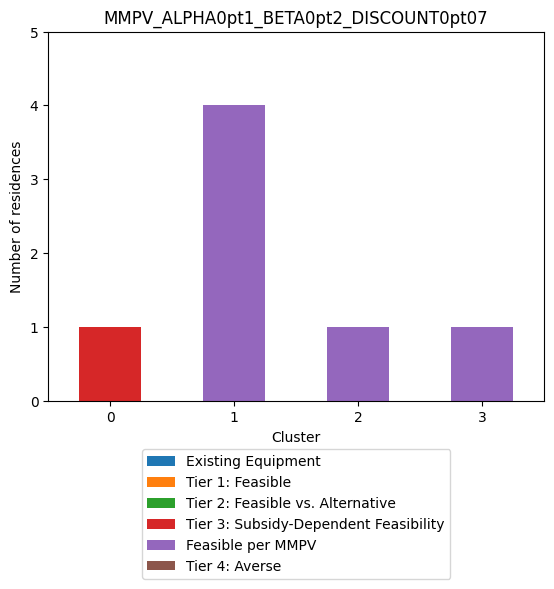

In [40]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

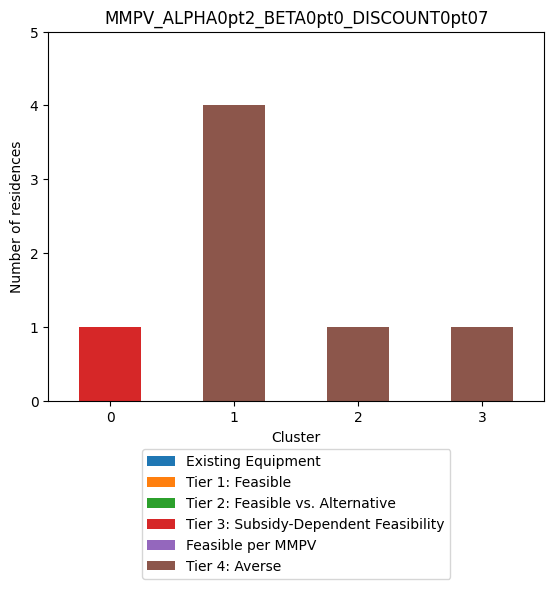

In [41]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

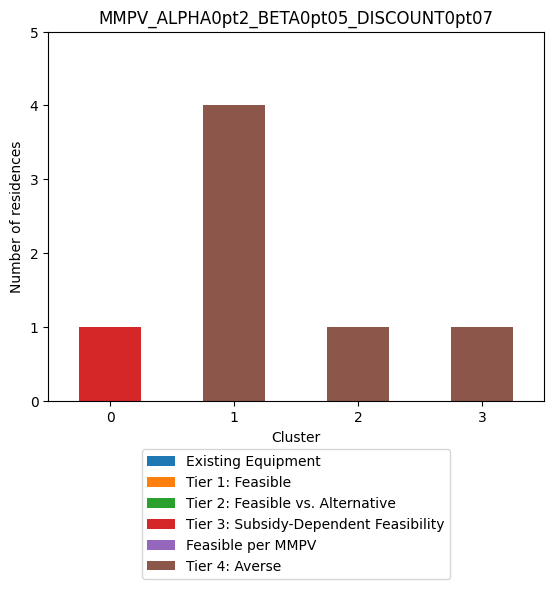

In [42]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


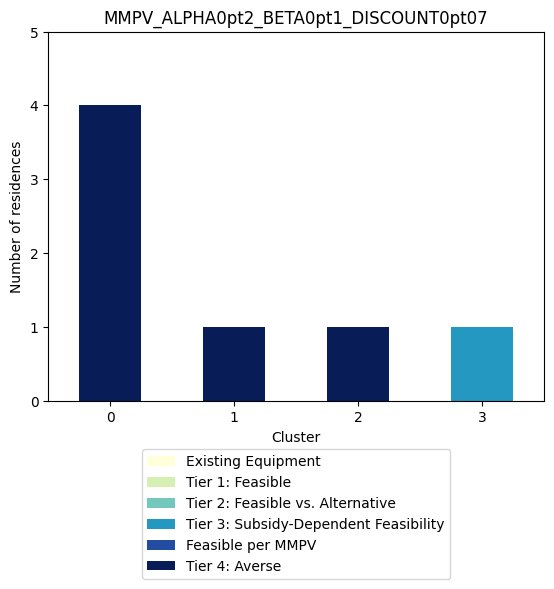

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


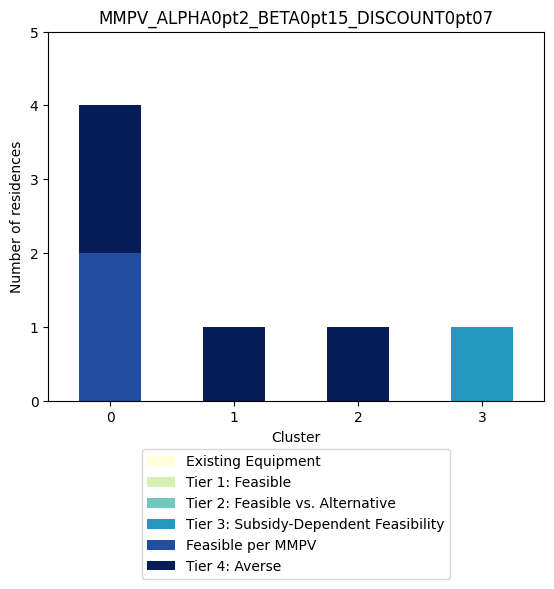

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


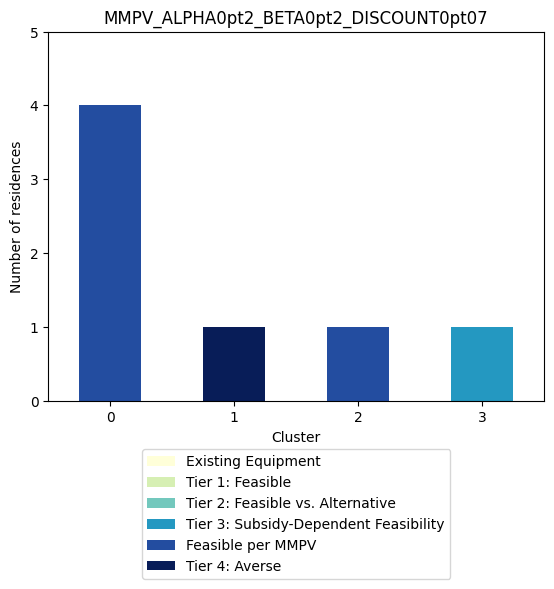

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

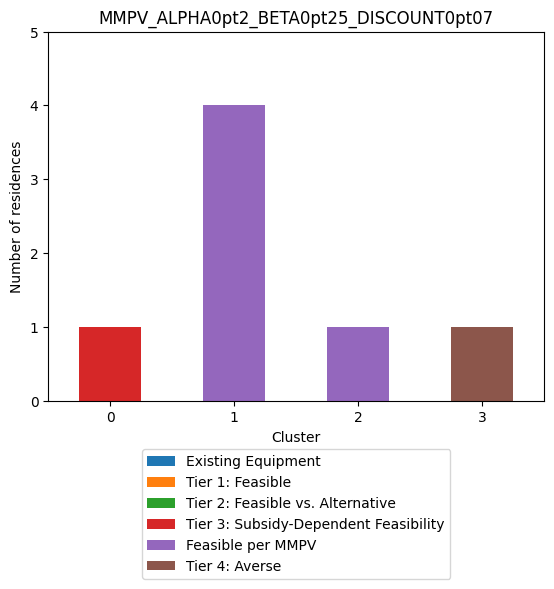

In [49]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt25_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


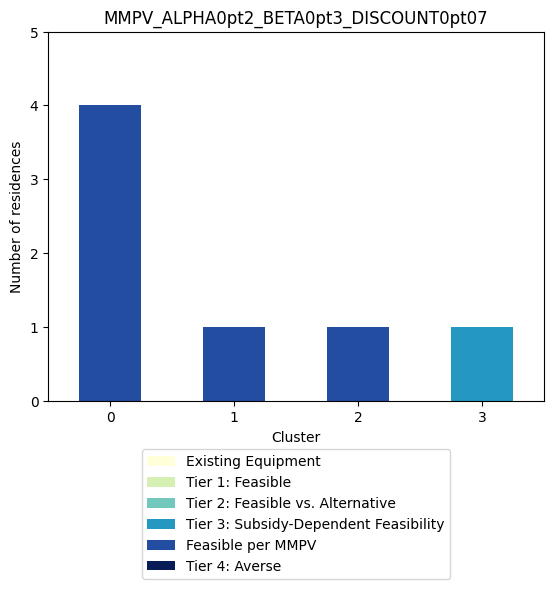

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")

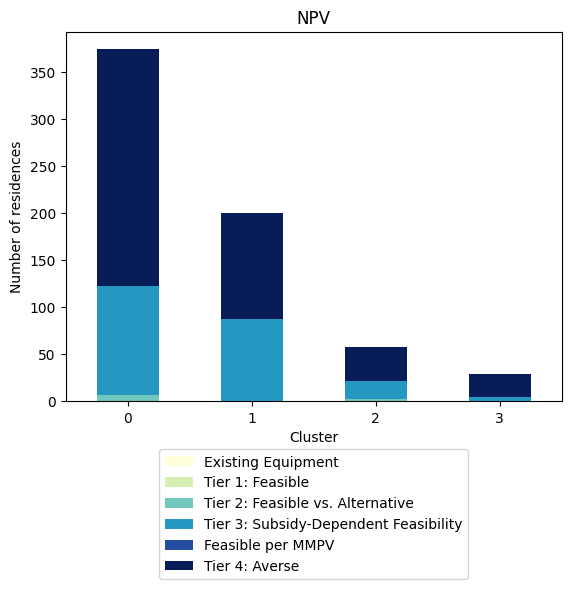

In [42]:
create_stacked_bar_chart(800, "NPV", prefix="alpha_beta")

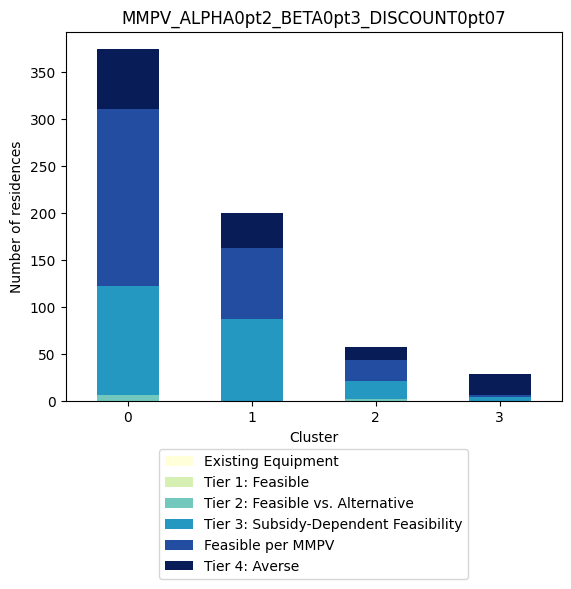

In [5]:
create_stacked_bar_chart(800, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")

In [1]:
def create_pie_chart_no_clusters(region_list, num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime
    if scenario == "NPV":
        adoption_tiers_to_use = original_adoption_tiers
    else:
        adoption_tiers_to_use = adoption_tiers
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{'_'.join(region_list)}_{num_residences}_{scenario}.csv")
    if not os.path.exists(filepath_name):
        table_to_fill = pd.DataFrame(index=adoption_tiers_to_use, columns=region_list)
        for region in region_list:
            file_name = os.path.join(os.getcwd(), "output_results",f"{region}_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
            # for unit_num in unit_numbers:
            #     for unit_type in building_unit_types:
            #         all_filenames.append()
                    
                    # file_name = os.path.join(os.getcwd(), "output_results",f"{region}_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
                    # print(file_name)
            if os.path.exists(file_name):
                # print(file_name)
                output = pd.read_csv(file_name)

                building_IDs = output["bldg_id"]

                if region == "national_ASHP":

                    # buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
                    buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv") # For PSC runs
                else:
                    buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"{region}_{num_residences}_all_unit_buildstock.csv") # For PSC runs
                buildstock_df = pd.read_csv(buildstock_path)
                full_building_id_list = buildstock_df["Building"]
                excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
                # else:
                #     excluded_building_ids = []
                # print(output.columns)
                # print(output.loc[0,"hvac_has_ducts"])
                for adoption_tier in adoption_tiers_to_use:
                    is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                    # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
                    table_to_fill.loc[adoption_tier,region] = np.sum(is_this_adoption_tier)
                # if region == "national_ASHP":
                table_to_fill.loc["Existing Equipment",region] += len(excluded_building_ids) # len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone) & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
            else:
                raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv")
                # table_to_fill.loc[adoption_tier,scenario] =  None
        table_to_fill = table_to_fill.rename(index={"Existing Equipment":"Don\'t have ducting"})
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=0)
        # table_to_fill = table_to_fill.set_index(table_to_fill.iloc[:,0], drop=True)
    print(table_to_fill)

    # Pie Chart
    for region in region_list:
        fig, ax = plt.subplots(figsize=(1,1))
        pie_plot_obj = table_to_fill.plot(kind='pie', y=region, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)
        ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
        plt.title(region.split("_")[0].upper(), loc="center")
        # plt.title(region.replace("_", " ").upper(), loc="center")
        # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # Bar Chart
    # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # plt.xticks(rotation=0)
    # plt.xlabel("Cluster")
    # plt.ylabel("Number of residences")
    # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # plt.title(scenario)

    if save_fig:
        plt.savefig(os.path.join("output_results", f"{'_'.join(region_list)}_{num_residences}_all_unit_residence", f"tiers_of_{'_'.join(region_list)}_{num_residences}_{scenario}.svg"))
    plt.show()

    return 


                                      urban_ohio urban_california  \
Existing Equipment                           240                0   
Tier 1: Feasible                               0                0   
Tier 2: Feasible vs. Alternative               6                5   
Tier 3: Subsidy-Dependent Feasibility        389                1   
Tier 4: Averse                               165              422   

                                      urban_florida  
Existing Equipment                                0  
Tier 1: Feasible                                  0  
Tier 2: Feasible vs. Alternative                188  
Tier 3: Subsidy-Dependent Feasibility             0  
Tier 4: Averse                                  483  


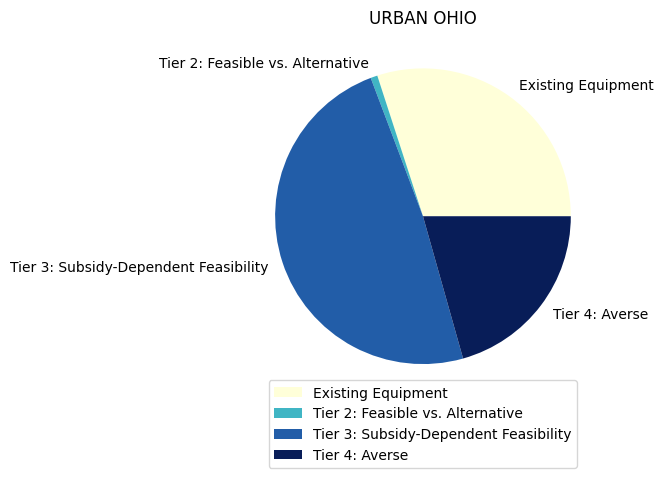

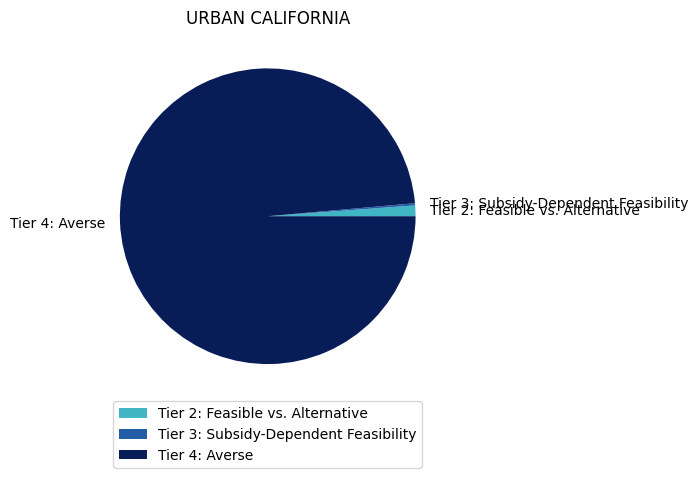

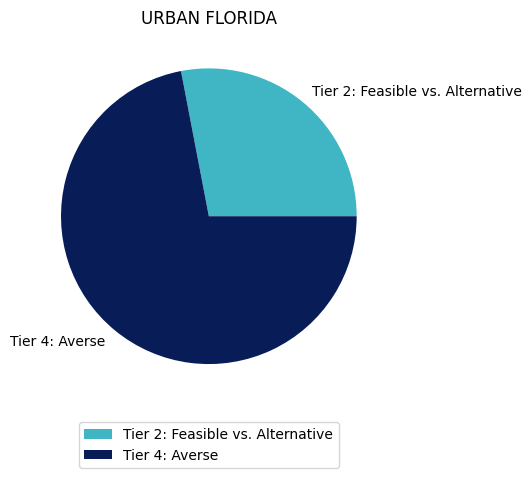

In [59]:
create_pie_chart_no_clusters(["urban_ohio","urban_california","urban_florida"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                       urban_ohio  rural_ohio
Existing Equipment                            240           0
Tier 1: Feasible                                0           0
Tier 2: Feasible vs. Alternative                6           8
Tier 3: Subsidy-Dependent Feasibility         389         403
Tier 4: Averse                                165         273


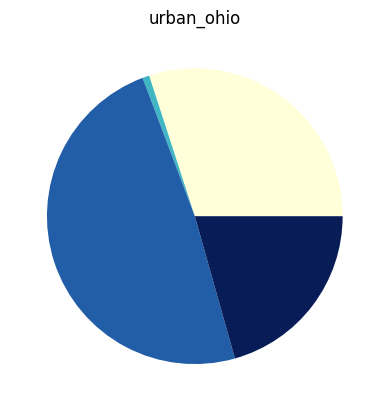

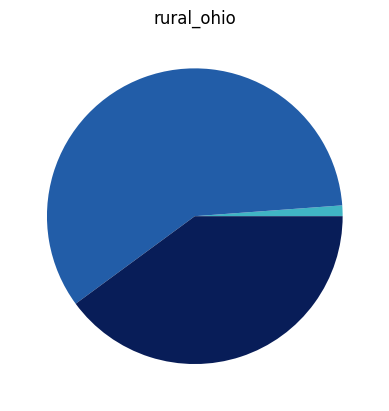

In [70]:
create_pie_chart_no_clusters(["urban_ohio","rural_ohio"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                      urban_utah
Existing Equipment                             0
Tier 1: Feasible                               0
Tier 2: Feasible vs. Alternative               2
Tier 3: Subsidy-Dependent Feasibility        177
Tier 4: Averse                               345


/tmp/ipykernel_501915/506965512.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pie_plot_obj = table_to_fill.plot(kind='pie', y=region, colormap="YlGnBu", ylabel='', xlabel='', legend=False, labels=None)#, legend=True)


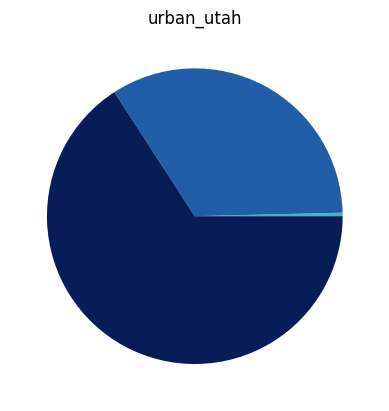

In [71]:
create_pie_chart_no_clusters(["urban_utah"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                      national_ASHP
Don't have ducting                             1291
Tier 1: Feasible                                  0
Tier 2: Feasible vs. Alternative                322
Tier 3: Subsidy-Dependent Feasibility          1799
Tier 4: Averse                                 4588


/tmp/ipykernel_66610/2987687984.py:26: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


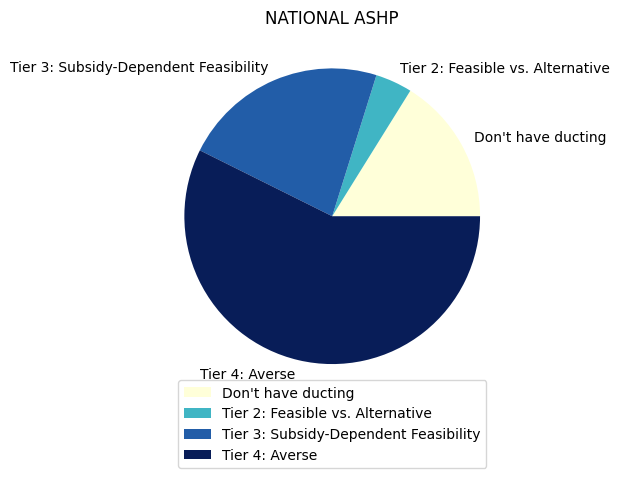

In [66]:
create_pie_chart_no_clusters(["national_ASHP"], 8000, "NPV", prefix="alpha_beta", save_fig = False)

In [4]:
def create_pie_charts_per_climate_zone(num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    if scenario == "NPV":
        adoption_tiers_to_use = original_adoption_tiers
    else:
        adoption_tiers_to_use = adoption_tiers
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{region_name}_{num_residences}_{scenario}_per_climate_zone.csv")
    if not os.path.exists(filepath_name):
        table_to_fill = pd.DataFrame(index=adoption_tiers_to_use)
        tare_file_name = os.path.join(os.getcwd(), "output_results",f"{region_name}_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
        if os.path.exists(tare_file_name):
            tare_output = pd.read_csv(tare_file_name)
            building_IDs = tare_output["bldg_id"]
            buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            # buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            buildstock_df = pd.read_csv(buildstock_path)
            full_building_id_list = buildstock_df["Building"]
            excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
            climate_zone_to_building_IDs_list_dict = {}
            for name, group in buildstock_df.groupby("ASHRAE IECC Climate Zone 2004"):
                climate_zone_to_building_IDs_list_dict[name] = group["Building"].tolist()
            # buildstock_df = buildstock_df[["Building", "ASHRAE IECC Climate Zone 2004"]]
            for climate_zone, buildings_in_climate_zone in climate_zone_to_building_IDs_list_dict.items():
                # buildings_in_climate_zone = [building_ID for building_ID in building_IDs if buildstock_df[buildstock_df["Building"]==building_ID][]]
                tare_output_subset = tare_output[tare_output["bldg_id"].isin(buildings_in_climate_zone)]
                for adoption_tier in adoption_tiers_to_use:
                    is_this_adoption_tier = tare_output_subset.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                    table_to_fill.loc[adoption_tier,climate_zone] = np.sum(is_this_adoption_tier)
                table_to_fill.loc["Existing Equipment",climate_zone] += len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone)]) # & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
        else:
            raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv at {tare_file_name}")
        table_to_fill = table_to_fill.rename(index={"Existing Equipment":"Don\'t have ducting"})        
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=0)
    print(table_to_fill)

    # print(table_to_fill.loc[:,"8AK"])

    # print(table_to_fill.index)
    # print(table_to_fill.columns)
    # return

    # Pie Chart
    for climate_zone in table_to_fill.columns:
        # print(table_to_fill.index)
        fig,ax= plt.subplots(figsize=(1,1))
        if sum(table_to_fill.loc[:,climate_zone]) == 0:
            continue
        pie_plot_obj = table_to_fill.plot(kind='pie', y=climate_zone, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
        plt.title(climate_zone.replace("_", " ").upper(), loc="center")
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)
        ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
        # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # Bar Chart
    # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # plt.xticks(rotation=0)
    # plt.xlabel("Cluster")
    # plt.ylabel("Number of residences")
    # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # plt.title(scenario)

        if save_fig:
            plt.savefig(os.path.join("output_results", f"{region_name}_{num_residences}_all_unit_residence", f"tiers_of_{region_name}_{num_residences}_{scenario}_{climate_zone}.svg"))
        plt.show()


                                         1A     2A     2B     3A     3B  \
Don't have ducting                     43.0   80.0   11.0   70.0  116.0   
Tier 1: Feasible                        0.0    0.0    0.0    0.0    0.0   
Tier 2: Feasible vs. Alternative       30.0  130.0   23.0   76.0   11.0   
Tier 3: Subsidy-Dependent Feasibility   0.0    0.0    0.0   24.0    2.0   
Tier 4: Averse                         71.0  718.0  124.0  894.0  614.0   

                                          3C      4A    4B     4C     5A  \
Don't have ducting                      38.0   368.0   5.0   52.0  352.0   
Tier 1: Feasible                         0.0     0.0   0.0    0.0    0.0   
Tier 2: Feasible vs. Alternative         0.0    43.0   1.0    3.0    3.0   
Tier 3: Subsidy-Dependent Feasibility    1.0   263.0   9.0   70.0  913.0   
Tier 4: Averse                         149.0  1048.0  47.0  105.0  535.0   

                                          5B     6A    6B    7A  7AK   7B  8AK  
Don't have 

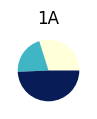

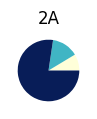

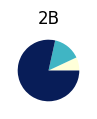

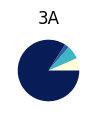

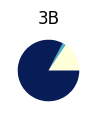

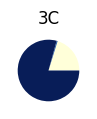

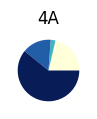

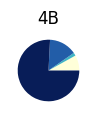

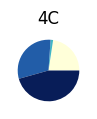

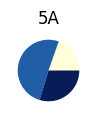

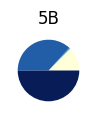

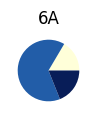

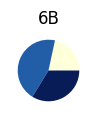

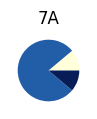

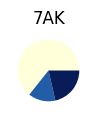

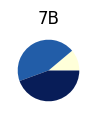

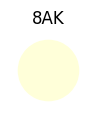

In [74]:
num_residences = 8000
scenario = "NPV"
create_pie_charts_per_climate_zone(num_residences, scenario, prefix="alpha_beta", save_fig = True)

In [2]:
climate_zones = ["1A","2A","2B","3A","3B","3C","4A","4B","4C","5A","5B","5C","6A","6B","7A","7B"]
level_of_urbanization_dict = {
    "In metro area, principal city":"urban",
    "In metro area, not/partially in principal city":"suburban",
    "Not/partially in metro area":"rural",
}
urbanization_level_dict = {
    "urban":"In metro area, principal city",
    "suburban":"In metro area, not/partially in principal city",
    "rural":"Not/partially in metro area",
}

adoption_tiers_to_use = ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Tier 4: Averse']

def create_table_per_climate_zone_and_level_of_urbanization(): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    scenario = "NPV"
    num_residences = 8000
    prefix="alpha_beta"
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{region_name}_{num_residences}_{scenario}_per_climate_zone_and_level_of_urbanization.csv")
    if not os.path.exists(filepath_name):
        table_to_fill = pd.DataFrame(index=pd.MultiIndex.from_product([climate_zones, level_of_urbanization_dict.values()]))
        tare_file_name = os.path.join(os.getcwd(), "output_results",f"{region_name}_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
        if os.path.exists(tare_file_name):
            tare_output = pd.read_csv(tare_file_name)
            building_IDs = tare_output["bldg_id"]
            # buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv") # For PSC runs
            buildstock_df = pd.read_csv(buildstock_path)
            full_building_id_list = buildstock_df["Building"]
            excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
            climate_zone_to_building_IDs_list_dict = {}
            level_of_urbanization_to_building_IDs_list_dict = {}
            for name, group in buildstock_df.groupby("ASHRAE IECC Climate Zone 2004"):
                climate_zone_to_building_IDs_list_dict[name] = group["Building"].tolist()
            for name, group in buildstock_df.groupby("PUMA Metro Status"):
                level_of_urbanization_to_building_IDs_list_dict[level_of_urbanization_dict[name]] = group["Building"].tolist()
            # buildstock_df = buildstock_df[["Building", "ASHRAE IECC Climate Zone 2004"]]
            for climate_zone, buildings_in_climate_zone in climate_zone_to_building_IDs_list_dict.items():
                for level_of_urbanization, buildings_in_level_of_urbanization in level_of_urbanization_to_building_IDs_list_dict.items():
                    # buildings_in_climate_zone = [building_ID for building_ID in building_IDs if buildstock_df[buildstock_df["Building"]==building_ID][]]
                    tare_output_subset = tare_output[(tare_output["bldg_id"].isin(buildings_in_climate_zone)) & (tare_output["bldg_id"].isin(buildings_in_level_of_urbanization))]
                    for adoption_tier in adoption_tiers_to_use:
                        is_this_adoption_tier = tare_output_subset.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                        table_to_fill.loc[(climate_zone,level_of_urbanization), adoption_tier] = np.sum(is_this_adoption_tier)
                    table_to_fill.loc[(climate_zone,level_of_urbanization), 'Don\'t have ducting'] = len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone) & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
        else:
            raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv at {tare_file_name}")
        table_to_fill["Total"] = table_to_fill.sum(axis=1)
        new_column_order = ['Don\'t have ducting']
        new_column_order.extend(adoption_tiers_to_use)
        new_column_order.append("Total")
        table_to_fill = table_to_fill.loc[:,new_column_order]
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=[0,1])
    return table_to_fill

    # # print(table_to_fill.loc[:,"8AK"])

    # # print(table_to_fill.index)
    # # print(table_to_fill.columns)
    # # return

    # # Pie Chart
    # for climate_zone in table_to_fill.columns:
    #     # print(table_to_fill.index)
    #     fig,ax= plt.subplots()
    #     if sum(table_to_fill.loc[:,climate_zone]) == 0:
    #         continue
    #     pie_plot_obj = table_to_fill.plot(kind='pie', y=climate_zone, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
    #     plt.title(climate_zone.replace("_", " ").upper(), loc="center")
    #     fig.patch.set_alpha(0)
    #     ax.patch.set_alpha(0)
    #     ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
    #     # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # # Bar Chart
    # # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # # plt.xticks(rotation=0)
    # # plt.xlabel("Cluster")
    # # plt.ylabel("Number of residences")
    # # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # # plt.title(scenario)

    #     if save_fig:
    #         plt.savefig(os.path.join("output_results", f"{region_name}_{num_residences}_all_unit_residence", f"tiers_of_{region_name}_{num_residences}_{scenario}_{climate_zone}.svg"))
    #     plt.show()


In [3]:
table_to_fill = create_table_per_climate_zone_and_level_of_urbanization()

In [4]:
table_to_fill

Don't have ducting  Tier 1: Feasible  \
1A  urban                    7.0               0.0   
    suburban                25.0               0.0   
    rural                   11.0               0.0   
2A  urban                   13.0               0.0   
    suburban                50.0               0.0   
    rural                   17.0               0.0   
2B  urban                    5.0               0.0   
    suburban                 6.0               0.0   
    rural                    0.0               0.0   
3A  urban                    9.0               0.0   
    suburban                33.0               0.0   
    rural                   28.0               0.0   
3B  urban                   52.0               0.0   
    suburban                63.0               0.0   
    rural                    1.0               0.0   
3C  urban                   15.0               0.0   
    suburban                22.0               0.0   
    rural                    1.0               0.0   
4A  urban                  209.0               0.0   
    suburban               124.0               0.0   
    rural                   35.0               0.0   
4B  urban                    0.0               0.0   
    suburban                 3.0               0.0   
    rural                    2.0               0.0   
4C  urban                   13.0               0.0   
    suburban                28.0               0.0   
    rural                   11.0               0.0   
5A  urban                   92.0               0.0   
    suburban               225.0               0.0   
    rural                   35.0               0.0   
5B  urban                    2.0               0.0   
    suburban                18.0               0.0   
    rural                   18.0               0.0   
5C  urban                    NaN               NaN   
    suburban                 NaN               NaN   
    rural                    NaN               NaN   
6A  urban                   11.0               0.0   
    suburban                37.0               0.0   
    rural                   33.0               0.0   
6B  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                   15.0               0.0   
7A  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                    6.0               0.0   
7B  urban                    0.0               0.0   
    suburban                 0.0               0.0   
    rural                    1.0               0.0   
7AK suburban                 0.0               0.0   
    urban                    3.0               0.0   
    rural                    6.0               0.0   
8AK suburban                 0.0               0.0   
    urban                    0.0               0.0   
    rural                    4.0               0.0   

              Tier 2: Feasible vs. Alternative  \
1A  urban                                  3.0   
    suburban                              26.0   
    rural                                  1.0   
2A  urban                                 11.0   
    suburban                             104.0   
    rural                                 15.0   
2B  urban                                  7.0   
    suburban                              14.0   
    rural                                  2.0   
3A  urban                                  7.0   
    suburban                              41.0   
    rural                                 28.0   
3B  urban                                  4.0   
    suburban                               7.0   
    rural                                  0.0   
3C  urban                                  0.0   
    suburban                               0.0   
    rural                                  0.0   
4A  urban                                  6.0   
    suburban                              2

In [100]:
table_to_fill["Total"].sum()

8000.0

In [5]:
# Assume `df` is your original multiindexed DataFrame
# Reset index for plotting
df_plot = table_to_fill.reset_index()
df_plot = df_plot.rename(columns={"level_0":"climate_zone","level_1":"level_of_urbanization"})
print(df_plot)



   climate_zone level_of_urbanization  Don't have ducting  Tier 1: Feasible  \
0            1A                 urban                 7.0               0.0   
1            1A              suburban                25.0               0.0   
2            1A                 rural                11.0               0.0   
3            2A                 urban                13.0               0.0   
4            2A              suburban                50.0               0.0   
5            2A                 rural                17.0               0.0   
6            2B                 urban                 5.0               0.0   
7            2B              suburban                 6.0               0.0   
8            2B                 rural                 0.0               0.0   
9            3A                 urban                 9.0               0.0   
10           3A              suburban                33.0               0.0   
11           3A                 rural               

In [6]:
# Specify the columns to use for category plotting (exclude 'Total')
category_cols = [col for col in table_to_fill.columns if col not in ['Total']]

# Melt for long-form dataframe suitable for seaborn
df_melted = df_plot.melt(
    id_vars=['climate_zone', 'level_of_urbanization'],
    value_vars=category_cols,
    var_name='Category',
    value_name='Count'
)



In [8]:
# df_melted

# Optional: Normalize counts to percentages within each group
df_melted['Percentage'] = (
    df_melted.groupby(['climate_zone', 'level_of_urbanization'])['Count']
    .transform(lambda x: x / x.sum() * 100)
)



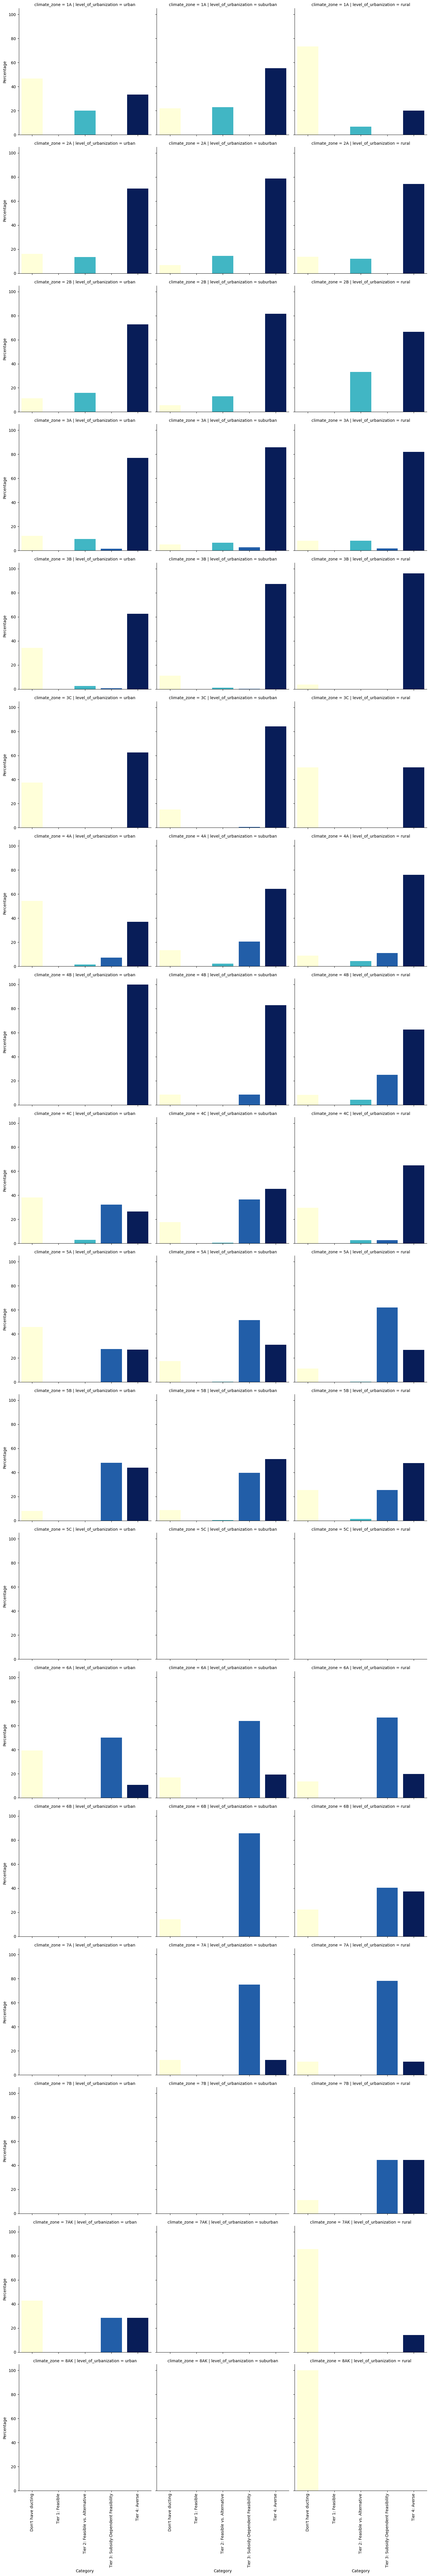

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


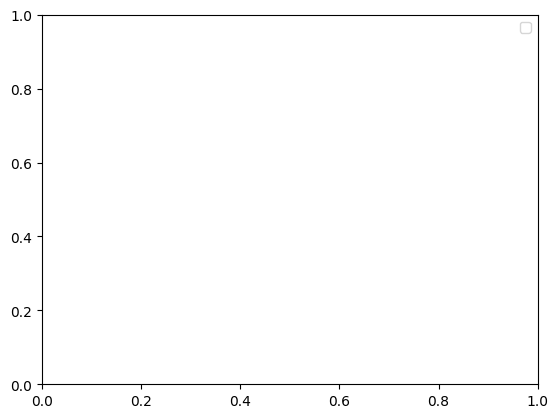

In [113]:
# Create category-to-color mapping
unique_categories = ["Don't have ducting"] + adoption_tiers_to_use
num_categories = len(unique_categories)

# Map each category to an index
category_to_index = {cat: i for i, cat in enumerate(unique_categories)}

# Define colormap and norm
cmap = plt.cm.get_cmap('YlGnBu', num_categories)
norm = mcolors.BoundaryNorm(boundaries=np.arange(num_categories + 1), ncolors=num_categories)

# Plot without hue
g = sns.catplot(
    data=df_melted,
    x='Category', y='Percentage',
    col='level_of_urbanization',
    row='climate_zone',
    kind='bar',
    height=5, aspect=1,
    sharey=True
)

# Apply custom colors to bars
for ax in g.axes.flat:
    # print(ax)
    xticks = ax.get_xticks()
        
    for bar in ax.patches:
        category_label = bar.get_x() + bar.get_width() / 2
        # xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
        idx = int(np.round(category_label))
        # if 0 <= idx < len(xticklabels):
        category = unique_categories[idx]
        color_idx = category_to_index.get(category, 0)
        bar.set_facecolor(cmap(color_idx))

    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.legend()
plt.show()



g.savefig(os.path.join("output_results", f"national_ASHP_8000_all_unit_residence", f"percent_breakdown_by_climate_zone_and_urbanization_level.svg"))


In [9]:
def create_pie_charts_per_climate_zone_and_level_of_urbanization(): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    table_to_plot = create_table_per_climate_zone_and_level_of_urbanization()
    table_to_plot = table_to_plot.drop("Total",axis=1)
    
    # Pie Chart
    for (climate_zone,level_of_urbanization) in table_to_plot.index:
        try:
            fig,ax= plt.subplots(figsize=(1,1))
            row_data = table_to_plot.loc[(climate_zone,level_of_urbanization)]

            pie_plot_obj = row_data.plot.pie(subplots=True, colormap="YlGnBu" , ylabel='', xlabel='', labels=None, legend=False, ax=ax) #
            plt.title(f"{climate_zone} {level_of_urbanization.title()}", loc="center")
            fig.patch.set_alpha(0)
            ax.patch.set_alpha(0)
            ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
            # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
            plt.show()
        except Exception as e:
            continue
       


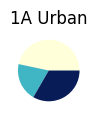

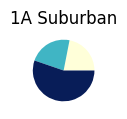

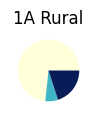

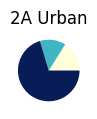

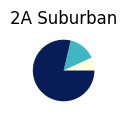

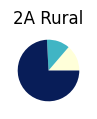

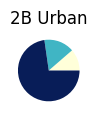

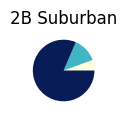

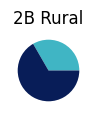

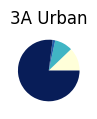

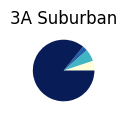

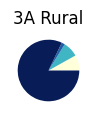

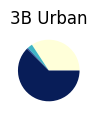

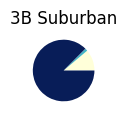

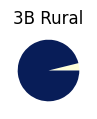

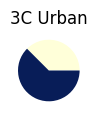

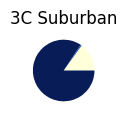

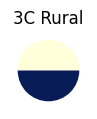

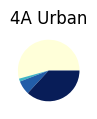

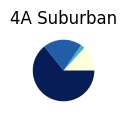

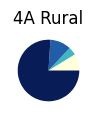

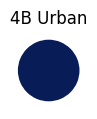

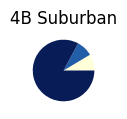

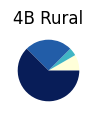

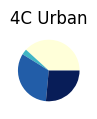

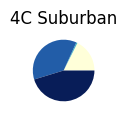

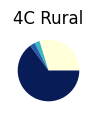

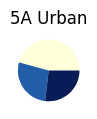

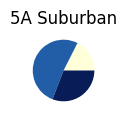

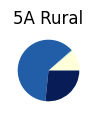

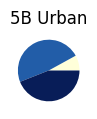

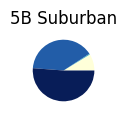

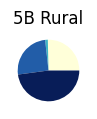

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

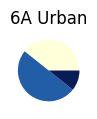

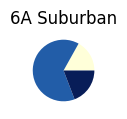

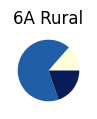

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

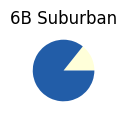

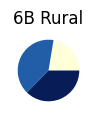

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

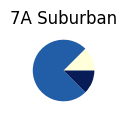

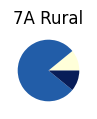

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

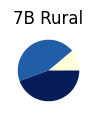

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

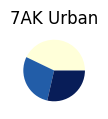

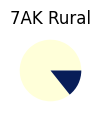

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

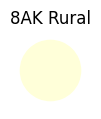

In [145]:
create_pie_charts_per_climate_zone_and_level_of_urbanization()

In [27]:
def create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=False): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    table_to_plot = create_table_per_climate_zone_and_level_of_urbanization()
    table_to_plot = table_to_plot.drop("Total",axis=1)
    level_0_values = ['1A', '2A', '2B', '3A', '3B', '3C', '4A', '4B', '4C', '5A', '5B', '5C', '6A', '6B', '7A', '7B', '7AK', '8AK']
    level_1_values = ['urban', 'suburban', 'rural']

    # Pie Chart
    if flip_direction:
        fig = plt.figure(figsize=(24,4))
    else:
        fig = plt.figure(figsize=(4,24))
    for k, (climate_zone,level_of_urbanization) in enumerate(product(level_0_values,level_1_values)):
        try:
            if climate_zone == "2B" and level_of_urbanization == "rural":
                print("Why is this missing?")
            if climate_zone == "4B" and level_of_urbanization == "urban":
                print("Why is this missing?")
            row_data = table_to_plot.loc[(climate_zone,level_of_urbanization)]
            print(row_data.sum())
            if np.all(np.isnan(row_data) | np.isnan(row_data.iloc[0])) or sum(row_data) == 0:
                print(f"{climate_zone} {level_of_urbanization}")
            # if climate_zone == "2B" and level_of_urbanization == "rural":
            #     print(row_data)
            #     print(row_data.sum())
            #     print(row_data.iloc[0])
            # if climate_zone == "4B" and level_of_urbanization == "urban":
            #     print(row_data)
            #     print(row_data.sum())
            #     print(row_data.iloc[0])
            if np.all(np.isnan(row_data) | np.isnan(row_data.iloc[0])) or sum(row_data) == 0: # or row_data.iloc[0] == 0:
            # if np.isnan(row_data.iloc[0]) or row_data.iloc[0] == 0:
                continue
            # print(row_data.iloc[0])
            # print(f"Item {k} is {climate_zone} and {level_of_urbanization}")
            if flip_direction:
                ax_obj = fig.add_subplot(3,20,((k//3)+20*(k%3))+1) # i need 1, 21, 41, 2, 22, 42
            else:
                ax_obj = fig.add_subplot(20,3,k+1)
            pie_plot_obj = row_data.plot.pie(subplots=True, colormap="YlGnBu" , ylabel='', xlabel='', labels=None, legend=False, ax=ax_obj) #
            plt.title(climate_zone, loc="center")
            # pie_plot_obj.patch.set_alpha(0)
            # ax_obj.patch.set_alpha(0)
            # ax_obj.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))

            if flip_direction:
                # print(climate_zone)
                if climate_zone == "1A":
                    # print('setting y label')
                    ax_obj.set_ylabel(level_of_urbanization)

            # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
            # plt.show()
        except Exception as e:
            # print(f"{i},{j}")
            print(e)
            continue
    # if flip_direction:
    #     fig.axes[0].set_ylabel("Urban")
    #     fig.axes[20].set_ylabel("Suburban")
    #     fig.axes[40].set_ylabel("Rural")
    plt.show()


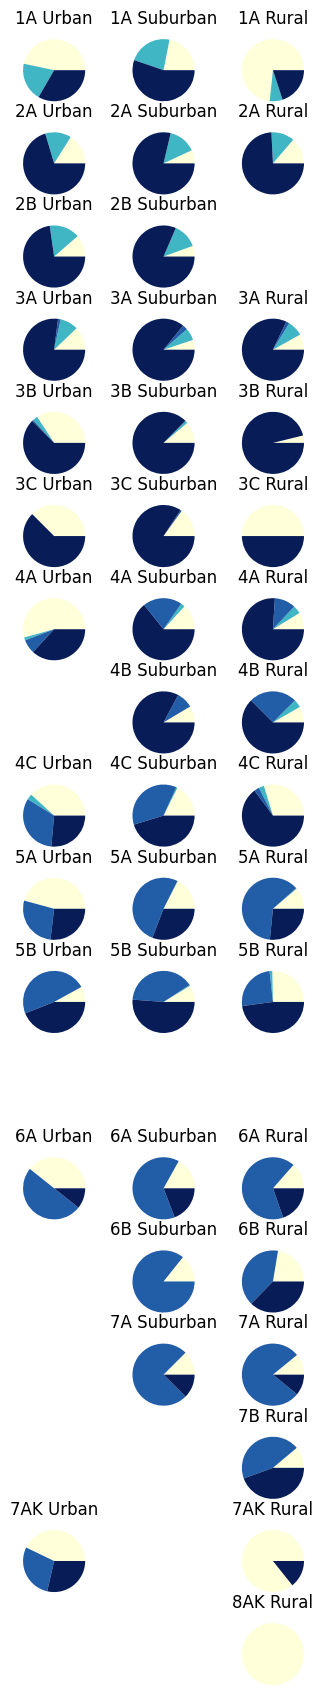

In [85]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization()

15.0
114.0
15.0
81.0
723.0
124.0
44.0
108.0
Why is this missing?
6.0
74.0
644.0
346.0
152.0
565.0
26.0
40.0
146.0
2.0
385.0
937.0
400.0
Why is this missing?
3.0
35.0
24.0
34.0
159.0
37.0
201.0
1290.0
312.0
25.0
207.0
71.0
0.0
5C urban
0.0
5C suburban
0.0
5C rural
28.0
219.0
244.0
0.0
6B urban
7.0
67.0
0.0
7A urban
8.0
55.0
0.0
7B urban
0.0
7B suburban
9.0
7.0
0.0
7AK suburban
7.0
0.0
8AK urban
0.0
8AK suburban
4.0


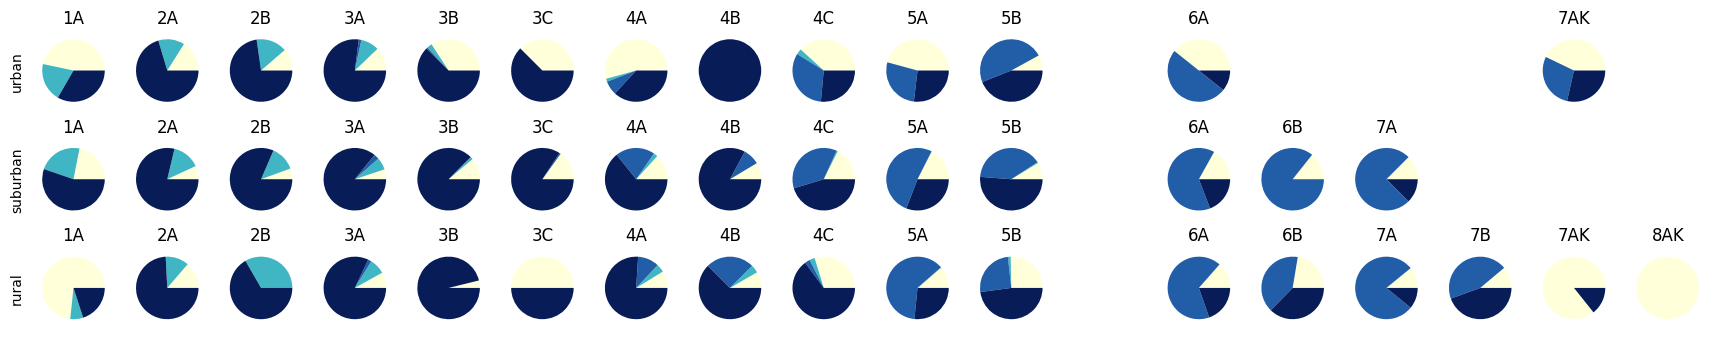

In [28]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True)

                                       7AK_suburban
Don't have ducting                                5
Tier 1: Feasible                                  0
Tier 2: Feasible vs. Alternative                  0
Tier 3: Subsidy-Dependent Feasibility             0
Tier 4: Averse                                    3


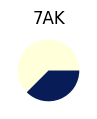

In [5]:
create_pie_chart_no_clusters(["7AK_suburban"], 8, "NPV", prefix="alpha_beta", save_fig = False)

                                       7B_urban
Don't have ducting                            1
Tier 1: Feasible                              0
Tier 2: Feasible vs. Alternative              0
Tier 3: Subsidy-Dependent Feasibility         5
Tier 4: Averse                                2


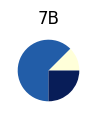

In [6]:
create_pie_chart_no_clusters(["7B_urban"], 8, "NPV", prefix="alpha_beta", save_fig = False)